In [20]:
# Parameters
import os
SIMULATTE_BASE_DIR = os.environ['SIMULATTE_BASE_DIR'] #"/Users/tiemokodembele/Documents/internShip/simulatte"
first_run = {"uid":143,"simulationUid":27,"name":"miniloan","description":"string","createDate":"2022-07-21T08:28:30.543+00:00","trace":True,"dataSink":{"format":"JSON","folderPath":f"{SIMULATTE_BASE_DIR}/data/ODM/loanvalidation","uri":f"{SIMULATTE_BASE_DIR}/data/ODM/loanvalidation/odm-22.0.1-miniloan-decisions-withtrace-20220721_133323-5K.json","username":"string","password":"string","uid":197},"decisionService":{"type":"ODM","endPoint":"http://localhost:9060/DecisionService/rest/miniloan/1.0/Miniloan_ServiceRuleset","authType":"NO_AUTH","username":"string","password":"string","key":"string","value":"string","token":"string","headerPrefix":"string","uid":170},"executor":{"type":"JSE","mode":"REMOTE","capability":"ODM","uid":143},"runReport":{"uid":143,"status":"FINISHED","numberOfDecisions":5000,"numberOfRequests":5000,"progress":0,"duration":16497,"numberOfDecisionsPerSecond":303.08542},"notebookUri":"/Users/tiemokodembele/Documents/internShip/simulatte/notebook/simulyticsOdm.ipynb"}
second_run = {"uid": 13, "simulationUid": 9, "name": "my runner", "description": "string", "createDate": 1656688188342, "trace": True, "dataSink": {"format": "JSON", "folderPath": f"{SIMULATTE_BASE_DIR}/data/ADS/loanvalidation", "uri": f"{SIMULATTE_BASE_DIR}/data/ADS/loanvalidation/run_my runner_20220701_170948.json", "username": "string", "password": "string", "uid": 31}, "decisionService": {"type": "ADS", "endPoint": "https://cpd-cp4a.apps.ads2201.cp.fyre.ibm.com/ads/runtime/api/v1/deploymentSpaces/embedded/decisions/_082213706%2Fpf2%2Fapproval_with_tasks%2FapprovalWithTasks-2DecisionService%2F1.4.0%2FapprovalWithTasks-2DecisionService-1.4.0.jar/operations/approvalWithTasks/extendedExecute", "authType": "ZEN_TOKEN", "username": "string", "password": "string", "key": "string", "value": "string", "token": "MDgyMjEzNzA2OjB6M3lwc29MZTJOOE1sQ2pDVDVSVXlmSHNXRDhDbjBKc1ZKZlN1aEI=", "headerPrefix": "string", "uid": 22}, "executor": {"type": "JSE", "mode": "REMOTE", "capability": "ODM", "uid": 13}, "runReport": {"uid": 13, "status": "FINISHED", "numberOfDecisions": 5000, "numberOfRequests": 5000, "progress": 1.0, "duration": 942367, "numberOfDecisionsPerSecond": 5.3057885}, "notebookUri": f"{SIMULATTE_BASE_DIR}/notebook/ads-vs-odm-loanvalidation-analytics.ipynb"}

__INSTALL DEPENDENCIES__

In [21]:
%%capture 

!pip install pgeocode
!pip install deepdiff

__LIBRAIRIES IMPORT__

In [22]:
import os
import sys

import requests
import random 

import pandas as pd 
import numpy as np
import json

from IPython.display import display, HTML
from deepdiff import DeepDiff
import re

__RUNS SPEC COMPARISON__ 

In [23]:
runs_diff = json.dumps(DeepDiff(first_run, 
                                second_run, 
                                exclude_paths={"root['uid']", 
                                                "root['name']", 
                                                "root['description']", 
                                                "root['createDate']", 
                                                "root['dataSink']", 
                                                "root['decisionService']['authType']", 
                                                "root['decisionService']['token']", 
                                                "root['decisionService']['uid']", 
                                                "root['executor']", 
                                                "root['runReport']['uid']"
                                                "root['runReport']['numberOfDecisionsPerSecond']"
                                                })['values_changed'], indent=4)



attribute_names = []
v1_values =[]
v2_values =[]
for key,value in json.loads(runs_diff).items():
     v1_values.append(value["old_value"])
     v2_values.append(value["new_value"])
     attribute_names.append('.'.join(re.findall(r'\'(.*?)\'', key)))

df = pd.DataFrame({
        'Attributes': attribute_names,
        'V1': v1_values,
        'V2': v2_values
    })
df

Attributes  \
0                         simulationUid   
1                  decisionService.type   
2              decisionService.endPoint   
3                         runReport.uid   
4                    runReport.duration   
5  runReport.numberOfDecisionsPerSecond   
6                           notebookUri   

                                                  V1  \
0                                                 27   
1                                                ODM   
2  http://localhost:9060/DecisionService/rest/min...   
3                                                143   
4                                              16497   
5                                          303.08542   
6  /Users/tiemokodembele/Documents/internShip/sim...   

                                                  V2  
0                                                  9  
1                                                ADS  
2  https://cpd-cp4a.apps.ads2201.cp.fyre.ibm.com/...  
3                                                 13  
4                                             942367  
5                                           5.305789  
6  /home/jovyan/work/notebook/ads-vs-odm-loanvali...

__READ DECISION SINK__

In [24]:
# data sink uris
datasink_odm_path = first_run["dataSink"]["uri"]
datasink_ads_path = second_run["dataSink"]["uri"]

print("URI ODM DATA SINK : "+datasink_odm_path)

outputDataODM = []
outputDataADS = []

if os.path.exists(datasink_odm_path):
    with open(datasink_odm_path) as file:
        filesize = os.path.getsize(datasink_odm_path)
        if filesize == 0:
            print("The file {} is empty".format(datasink_odm_path))
        else:
            while (line := file.readline().rstrip()):
                jsonLine = dict()
                line_to_json = json.loads(line)
                jsonLine["request"] = line_to_json["request"]
                if(line_to_json["trace"]=="empty"):
                    jsonLine["trace"] = "empty"
                else:
                    jsonLine["trace"] = line_to_json["trace"]
                jsonLine["response"] = line_to_json["response"]

                outputDataODM.append(jsonLine)

if os.path.exists(datasink_ads_path):
    with open(datasink_ads_path) as file:
        filesize = os.path.getsize(datasink_ads_path)
        if filesize == 0:
            print("The file {} is empty".format(datasink_ads_path))
        else:
            while (line := file.readline().rstrip()):
                jsonLine = dict()
                line_to_json = json.loads(line)
                jsonLine["request"] = json.loads(line_to_json["request"])
                if(line_to_json["trace"]=="empty"): 
                    jsonLine["trace"] = "empty" 
                else: 
                    jsonLine["trace"] = json.loads(line_to_json["trace"])
                jsonLine["response"] = json.loads(line_to_json["response"])

                outputDataADS.append(jsonLine)

datasink_odm = pd.json_normalize(outputDataODM)
datasink_ads = pd.json_normalize(outputDataADS)

display(datasink_odm.head(5))
display(datasink_ads.head(5))

URI ODM DATA SINK : /home/jovyan/work/data/ODM/loanvalidation/odm-22.0.1-miniloan-decisions-withtrace-20220721_133323-5K.json


request.loan.duration  request.loan.amount  \
0                    162               783440   
1                    183              1787385   
2                     75              1733494   
3                     72              1350004   
4                    160              1210944   

   request.loan.yearlyInterestRate  request.loan.yearlyRepayment  \
0                         0.030005                         70648   
1                         0.054819                        173197   
2                         0.055183                        328563   
3                         0.043400                        255970   
4                         0.037772                        115742   

   request.borrower.creditScore request.borrower.name  \
0                           736     Stephanie Roberts   
1                           527          Julie Harris   
2                           460           Andre Cohen   
3                           751          April Grimes   
4                           684      Stephen Gonzales   

   request.borrower.yearlyIncome  \
0                         113243   
1                         224186   
2                          39954   
3                         219998   
4                          72470   

   request.__TraceFilter__.infoExecutionEventsAsked  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

   request.__TraceFilter__.infoTasks  \
0                              False   
1                              False   
2                              False   
3                              False   
4                              False   

   request.__TraceFilter__.infoExecutionDuration  ...  \
0                                           True  ...   
1                                           True  ...   
2                                           True  ...   
3                                           True  ...   
4                                           True  ...   

                trace.outputParameters.loan.messages  \
0  [Too big Debt-To-Income ratio, debt-to-income ...   
1                 [The loan cannot exceed 1,000,000]   
2                 [The loan cannot exceed 1,000,000]   
3                 [The loan cannot exceed 1,000,000]   
4                 [The loan cannot exceed 1,000,000]   

   trace.outputParameters.loan.yearlyInterestRate  \
0                                        0.030005   
1                                        0.054819   
2                                        0.055183   
3                                        0.043400   
4                                        0.037772   

   trace.outputParameters.loan.yearlyRepayment  response.loan.duration  \
0                                        70648                     162   
1                                       173197                     183   
2                                       328563                      75   
3                                       255970                      72   
4                                       115742                     160   

   response.loan.amount  response.loan.approved  \
0                783440                   False   
1               1787385                   False   
2               1733494                   False   
3               1350004                   False   
4               1210944                   False   

                              response.loan.messages  \
0  [Too big Debt-To-Income ratio, debt-to-income ...   
1                 [The loan cannot exceed 1,000,000]   
2                 [The loan cannot exceed 1,000,000]   
3                 [The loan cannot exceed 1,000,000]   
4                 [The loan cannot exceed 1,000,000]   

   response.loan.yearlyInterestRate response.loan.yearlyRepayment  \
0         

request.loan.amount  request.loan.loanToValue  \
0               783440                       0.7   
1              1787385                       0.7   
2              1733494                       0.7   
3              1350004                       0.7   
4              1210944                       0.7   

   request.loan.numberOfMonthlyPayments request.loan.startDate  \
0                                   162   2005-06-01T00:00:00Z   
1                                   183   2005-06-01T00:00:00Z   
2                                    75   2005-06-01T00:00:00Z   
3                                    72   2005-06-01T00:00:00Z   
4                                   160   2005-06-01T00:00:00Z   

  request.borrower.firstName request.borrower.lastName  \
0                     Cheryl                    Garcia   
1                   Jonathan                   Jackson   
2                      Jamie                    Howard   
3                     Andrew                   Shaffer   
4                      Marie                    Garcia   

  request.borrower.zipCode  request.borrower.creditScore  \
0                    51659                           736   
1                    43177                           527   
2                    31149                           460   
3                    18542                           751   
4                    05598                           684   

  request.borrower.birthDate  request.borrower.yearlyIncome  ...  \
0       1982-05-12T00:00:00Z                         113243  ...   
1       1968-05-12T00:00:00Z                         224186  ...   
2       1980-05-12T00:00:00Z                          39954  ...   
3       1980-05-12T00:00:00Z                         219998  ...   
4       1911-05-12T00:00:00Z                          72470  ...   

  response.borrower.yearlyIncome response.borrower.spouse  \
0                         113243                     None   
1                         224186                     None   
2                          39954                     None   
3                         219998                     None   
4                          72470                     None   

  response.borrower.SSN.serialNumber response.borrower.SSN.areaNumber  \
0                               6789                              038   
1                               6789                              424   
2                               6789                              151   
3                               6789                              258   
4                               6789                              618   

  response.borrower.SSN.groupCode               response.__DecisionID__  \
0                              45  4f920be9-c615-4d5f-b1fe-48acb9623533   
1                              45  bd0d3dc2-6c44-4a53-8c56-fcd689862514   
2                              45  61d494e9-9911-49bf-92a1-86a09ed25628   
3                              45  73680b52-21b1-49d9-8f9f-21bc65f6a1a3   
4                              45  4308f4a4-5f9c-4621-ab4e-d04ed2789cd7   

                                   response.messages response.dataValidated  \
0  [Too big Debt/Income ratio, Very low risk loan...                   True   
1                   [The loan cannot exceed 1300000]                  False   
2                   [The loan cannot exceed 1300000]                  False   
3                   [The loan cannot exceed 1300000]                  False   
4  [Too big Debt/Income ratio, Very low risk loan...                   True   

  response.yearlyInterestRate response.insurance  
0                       0.082                NaN  
1                       0.000                NaN  
2                       0.000                NaN  
3                       0.000                NaN  
4                       0.082                NaN  

[5 rows x 70 columns]

GET
- Total of approved amounts
- Total of requested amounts 
- f(yearlyIncome)=loanAmount

In [25]:
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected = True)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pgeocode

#Graph configs
approval_colors = ["#00CC96", "#FF6692"]
color_indices = [0, 1]

pie_chart_approval_loan_names = ['approved', 'rejected']
pie_chart_loan_amount_names = ['approved amount', 'rejected amount']
bidirectional_bar_chart_label_ads=['number of applications', 'sum of applications amounts']
bidirectional_bar_chart_label_odm=['number of applications', 'sum of applications amounts']
bidirectional_bar_chart_label=['number of rejected applications', 'sum of rejected applications amounts', 'number of approved applications', 'sum of approved applications amounts']
radar_chart_labels=['number of rejected applications', 'sum of rejected applications amounts', 'number of approved applications', 'sum of approved applications amounts', 'ratio approved/requested']

Metrics

In [26]:
########### ADS #############
select_approved_decision_ads = '`response.approved` == True'
select_rejected_decision_ads = '`response.approved` == False'

get_decision_approval_ads = 'response.approved'
get_decision_amount_ads = 'response.loan.amount'
get_decision_borrower_zipcode_ads = 'response.borrower.zipCode'
get_decision_borrower_yearly_income_ads = 'response.borrower.yearlyIncome'
get_decision_borrower_credit_score_ads = "response.borrower.creditScore"
get_decision_id_ads = 'response.__DecisionID__'
get_decision_reimbursement_rate_ads = 'response.yearlyInterestRate'

########### ODM #############
select_approved_decision_odm = '`response.loan.approved` == True'
select_rejected_decision_odm = '`response.loan.approved` == False'

get_decision_approval_odm = 'response.loan.approved'
get_decision_amount_odm = 'response.loan.amount'
get_decision_borrower_yearly_income_odm = 'request.borrower.yearlyIncome'
get_decision_borrower_credit_score_odm = "request.borrower.creditScore"
get_decision_id_odm = 'response.__DecisionID__'
get_decision_reimbursement_rate_odm = 'response.loan.yearlyInterestRate'


KPIs

In [27]:
########### ADS #############
approved_loan_ads = datasink_ads.query(select_approved_decision_ads)
rejected_loan_ads = datasink_ads.query(select_rejected_decision_ads)


########### ODM #############
approved_loan_odm = datasink_odm.query(select_approved_decision_odm)
rejected_loan_odm = datasink_odm.query(select_rejected_decision_odm)




########### Approved/Rejected PRINT #############
print("ADS : Number of approved loan request = ", approved_loan_ads.shape[0])
print("ADS : Number of rejected loan request = ", rejected_loan_ads.shape[0])
print("ADS : Rate of approval = ", approved_loan_ads.shape[0]/datasink_ads.shape[0])

print("ODM : Number of approved loan request = ", approved_loan_odm.shape[0])
print("ODM : Number of rejected loan request = ", rejected_loan_odm.shape[0])
print("ODM : Rate of approval = ", approved_loan_odm.shape[0]/datasink_odm.shape[0])


########### Approved/Rejected Amount PRINT #############
print("ADS : Total approved amount = ",datasink_ads.query(select_approved_decision_ads)[get_decision_amount_ads].sum())
print("ADS : Total rejected amount = ",datasink_ads.query(select_rejected_decision_ads)[get_decision_amount_ads].sum())
print("ADS : Total requested amount = ",datasink_ads[get_decision_amount_ads].sum())

print("ODM : Total approved amount = ",datasink_odm.query(select_approved_decision_odm)[get_decision_amount_odm].sum())
print("ODM : Total rejected amount = ",datasink_odm.query(select_rejected_decision_odm)[get_decision_amount_odm].sum())
print("ODM : Total requested amount = ",datasink_odm[get_decision_amount_odm].sum())

ADS : Number of approved loan request =  925
ADS : Number of rejected loan request =  4075
ADS : Rate of approval =  0.185
ODM : Number of approved loan request =  1087
ODM : Number of rejected loan request =  3913
ODM : Rate of approval =  0.2174
ADS : Total approved amount =  274938211
ADS : Total rejected amount =  4767814177
ADS : Total requested amount =  5042752388
ODM : Total approved amount =  366173820
ODM : Total rejected amount =  4676578568
ODM : Total requested amount =  5042752388


Visualization

__DONUT CHART__

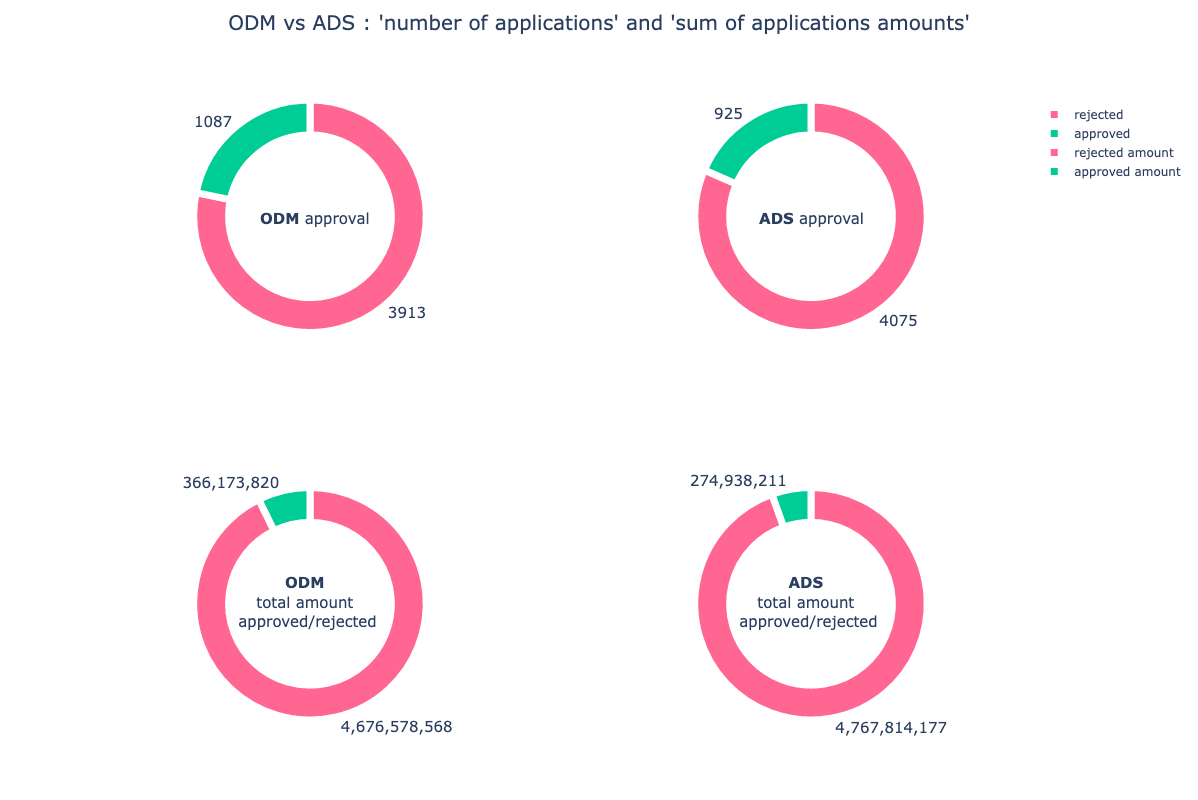

In [28]:
########### settings ###########
donut_hole = 0.7

########### Approved/Rejected PIE CHART #############
trace_approval_ads = go.Pie(labels = pie_chart_approval_loan_names,
                            values = [approved_loan_ads.shape[0], rejected_loan_ads.shape[0]],
                            hole = donut_hole)
trace_approval_odm = go.Pie(labels = pie_chart_approval_loan_names,
                            values = [approved_loan_odm.shape[0], rejected_loan_odm.shape[0]],
                            hole = donut_hole)


########### Approved/Rejected Amount PIE CHART #############
trace_amount_ads = go.Pie(values=[datasink_ads.query(select_approved_decision_ads)[get_decision_amount_ads].sum(),
                                datasink_ads.query(select_rejected_decision_ads)[get_decision_amount_ads].sum()],
                            labels=pie_chart_loan_amount_names,
                            hole = donut_hole,
                            name="Loan amount ADS")
trace_amount_odm = go.Pie(values=[datasink_odm.query(select_approved_decision_odm)[get_decision_amount_odm].sum(),
                                datasink_odm.query(select_rejected_decision_odm)[get_decision_amount_odm].sum()],
                            labels=pie_chart_loan_amount_names,
                          hole = donut_hole,
                            name="Loan amount ODM")

fig = make_subplots(rows=2, cols=2,
                    specs=[[{"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}]],
                    column_widths=[0.5, 0.5],
                    #vertical_spacing=0.001,
                    subplot_titles=("ODM approval", "ADS approval", "ODM approved/rejected amount", "ADS approved/rejected amount")
                    )

fig.add_trace(trace_approval_odm, row=1, col=1)
fig.add_trace(trace_approval_ads, row=1, col=2)
fig.add_trace(trace_amount_odm, row=2, col=1)
fig.add_trace(trace_amount_ads, row=2, col=2)

fig.update_traces(hoverinfo='label', textinfo='value', textfont_size=15, textposition="outside",
                  marker=dict(colors=approval_colors, line=dict(color='#FFFFFF', width=7)))
                
fig.update_annotations(yshift=20) # subplot tiltes

fig.update_layout(
    barmode='stack',
    plot_bgcolor = "white",
    #paper_bgcolor = 'lightgray',
    height=800,
    title={'text': f"ODM vs ADS : 'number of applications' and 'sum of applications amounts'",
          'x':0.5,
          'y':0.98,
          'xanchor': 'center',
          'font_size': 20
    },
    annotations= [
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>ODM</b><br>total amount<br> approved/rejected",
            "x": 0.22,
            "y": 0.11
         },
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>ADS</b><br>total amount<br> approved/rejected",
            "x": 0.77,
            "y": 0.11
         },
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>ODM</b> approval",
            "x": 0.23,
            "y": 0.76
         },
         {
            "font": {
               "size": 15
            },
            "showarrow": False,
            "text": "<b>ADS</b> approval",
            "x": 0.775,
            "y": 0.76
         }
      ],
      )

iplot(fig)

__SCATTER CHART__

In [29]:
def array_normalize(values, max_value=1):
    normalized_values = []
    for value in values:
        normalized_values.append((value*max_value)/max(values))
    return normalized_values

def set_colors(values, true_color="#00CC96", false_color="#FF6692"):
    colors = []
    for value in values:
        if(value): 
            colors.append(true_color) 
        else: 
            colors.append(false_color) 
    return colors

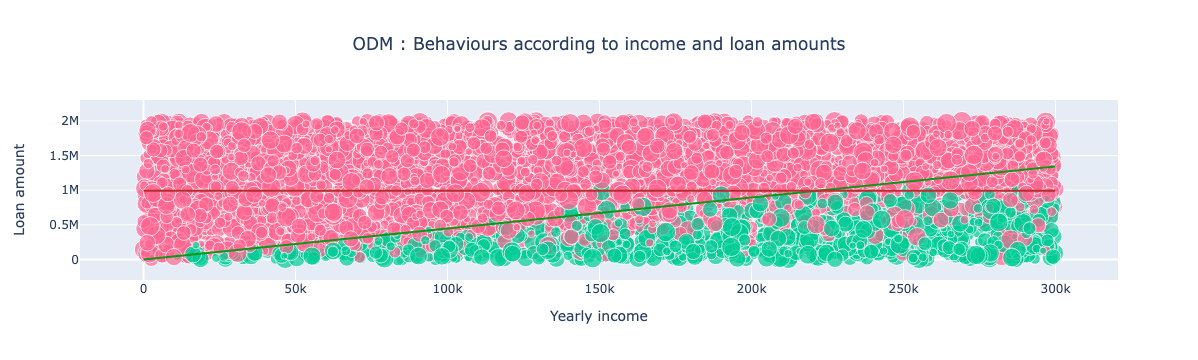

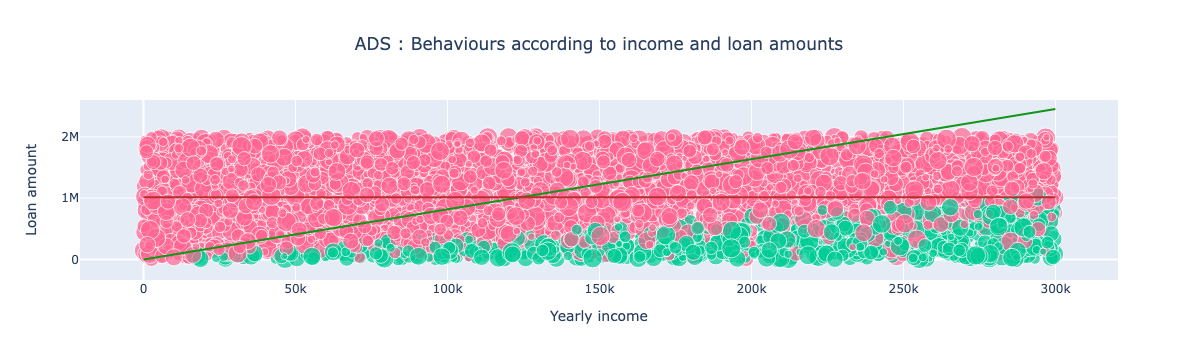

In [30]:
fig1 = go.Figure()
fig1.add_trace(go.Scatter(
                 x=datasink_odm[get_decision_borrower_yearly_income_odm],
                 y=datasink_odm[get_decision_amount_odm],
                 mode='markers',
                 marker_size=array_normalize(datasink_odm[get_decision_borrower_credit_score_odm], 20), 
                 marker_color=set_colors(datasink_odm[get_decision_approval_odm]),
                 text=datasink_odm[get_decision_approval_odm], 
                 hovertext=datasink_odm[get_decision_id_odm],
                 hovertemplate="<b>Income:</b> %{x}<br><b>Loan amount:</b> %{y}<br><b>Approval:</b> %{text}<br><b>Id:</b> %{hovertext}<extra></extra>",
                 name='ODM'
))

fig1.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_odm[get_decision_borrower_yearly_income_odm])]),
        y=100*datasink_odm.query(select_approved_decision_odm)[get_decision_reimbursement_rate_odm].mean()*np.array([0, max(datasink_odm[get_decision_borrower_yearly_income_odm])]),
        mode="lines",
        line=go.scatter.Line(color="#109618"),
        showlegend=False)
)
fig1.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_odm[get_decision_borrower_yearly_income_odm])]),
        y=max(datasink_odm.query(select_approved_decision_odm)[get_decision_amount_odm])*np.array([1, 1]),
        mode="lines",
        line=go.scatter.Line(color="#B82E2E"), ##B82E2E
        showlegend=False)
)


fig2 = go.Figure()
fig2.add_trace(go.Scatter(
                 x=datasink_ads[get_decision_borrower_yearly_income_ads],
                 y=datasink_ads[get_decision_amount_ads],
                 mode='markers',
                 marker_size=array_normalize(datasink_ads[get_decision_borrower_credit_score_ads], 20), 
                 marker_color=set_colors(datasink_ads[get_decision_approval_ads]),
                 text=datasink_ads[get_decision_approval_ads], 
                 hovertext=datasink_ads[get_decision_id_ads],
                 hovertemplate="<b>Income:</b> %{x}<br><b>Loan amount:</b> %{y}<br><b>Approval:</b> %{text}<br><b>Id:</b> %{hovertext}<extra></extra>",
                 name='ODM'
))

fig2.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_ads[get_decision_borrower_yearly_income_ads])]),
        y=100*datasink_ads.query(select_approved_decision_ads)[get_decision_reimbursement_rate_ads].mean()*np.array([0, max(datasink_ads[get_decision_borrower_yearly_income_ads])]),
        mode="lines",
        line=go.scatter.Line(color="#109618"),
        showlegend=False)
)
fig2.add_trace(
    go.Scatter(
        x=np.array([0, max(datasink_ads[get_decision_borrower_yearly_income_ads])]),
        y=max(datasink_ads.query(select_approved_decision_ads)[get_decision_amount_ads])*np.array([1, 1]),
        mode="lines",
        name='<b>Max amount</b> horizontal bar',
        line=go.scatter.Line(color="#B82E2E"), ##B82E2E
        showlegend=False)
)

"""
fig = make_subplots(rows=1, cols=2,
                    specs=[[{},{}]],
                    subplot_titles=("ODM", "ADS")
                    )
fig.add_trace(fig1, row=1, col=1)
fig.add_trace(fig2, row=1, col=2)

fig.update_layout(
    barmode='stack', 
    title={'text': f"creditScore vs Income",
          'x':0.5,
          'xanchor': 'center'
    })
"""

fig1.update_xaxes(title_text='Yearly income')
fig1.update_yaxes(title_text='Loan amount')

fig1.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"ODM : Behaviours according to income and loan amounts",
          'x':0.5,
          'xanchor': 'center'
    })


fig2.update_xaxes(title_text='Yearly income')
fig2.update_yaxes(title_text='Loan amount')

fig2.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"ADS : Behaviours according to income and loan amounts",
          'x':0.5,
          'xanchor': 'center'
    })

iplot(fig1)
iplot(fig2)

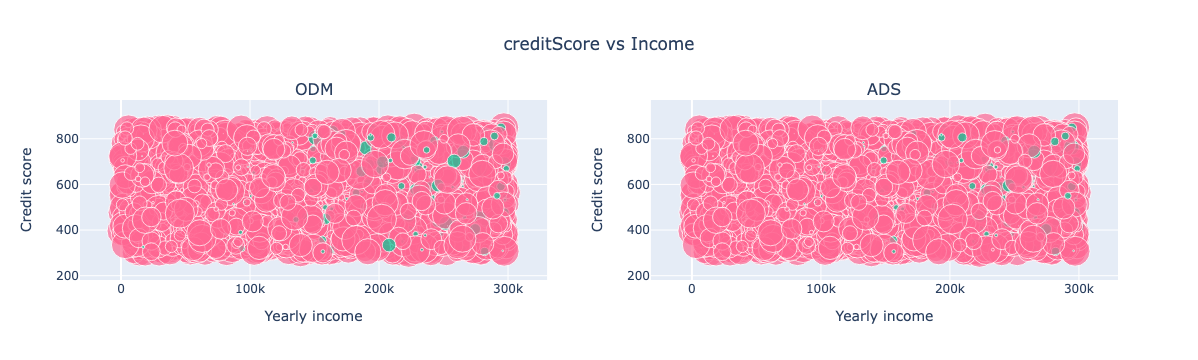

In [31]:
############ SCATTER CHART #############
max_marker_size = 30
trace_scatter_odm = go.Scatter(
                 x=datasink_odm[get_decision_borrower_yearly_income_odm],
                 y=datasink_odm[get_decision_borrower_credit_score_odm],
                 mode='markers',
                 marker_size=array_normalize(datasink_odm[get_decision_amount_odm], max_marker_size), 
                 marker_color=set_colors(datasink_odm[get_decision_approval_odm]),
                 text=datasink_ads[get_decision_approval_ads], 
                 hovertemplate="<b>Income:</b> %{x}<br><b>creditScore:</b> %{y}<br><b>Approval:</b> %{text}<extra></extra>",
                 name='ODM'
)

trace_scatter_ads = go.Scatter(
                 x=datasink_ads[get_decision_borrower_yearly_income_ads],
                 y=datasink_ads[get_decision_borrower_credit_score_ads],
                 mode='markers',
                 marker_size=array_normalize(datasink_ads[get_decision_amount_ads], max_marker_size), 
                 marker_color=set_colors(datasink_ads[get_decision_approval_ads]),
                 text=datasink_ads[get_decision_approval_ads], 
                 hovertemplate="<b>Income:</b> %{x}<br><b>creditScore:</b> %{y}<br><b>Approval:</b> %{text}<extra></extra>",
                 name='ADS',
)

fig = make_subplots(rows=1, cols=2,
                    specs=[[{"type": "scatter"},{"type": "scatter"}]],
                    subplot_titles=("ODM", "ADS")
                    )
fig.add_trace(trace_scatter_odm, row=1, col=1)
fig.add_trace(trace_scatter_ads, row=1, col=2)

fig.update_xaxes(title_text='Yearly income')
fig.update_yaxes(title_text='Credit score')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"creditScore vs Income",
          'x':0.5,
          'xanchor': 'center'
    })

iplot(fig)

__BIDIRECTIONAL BAR CHARTS__

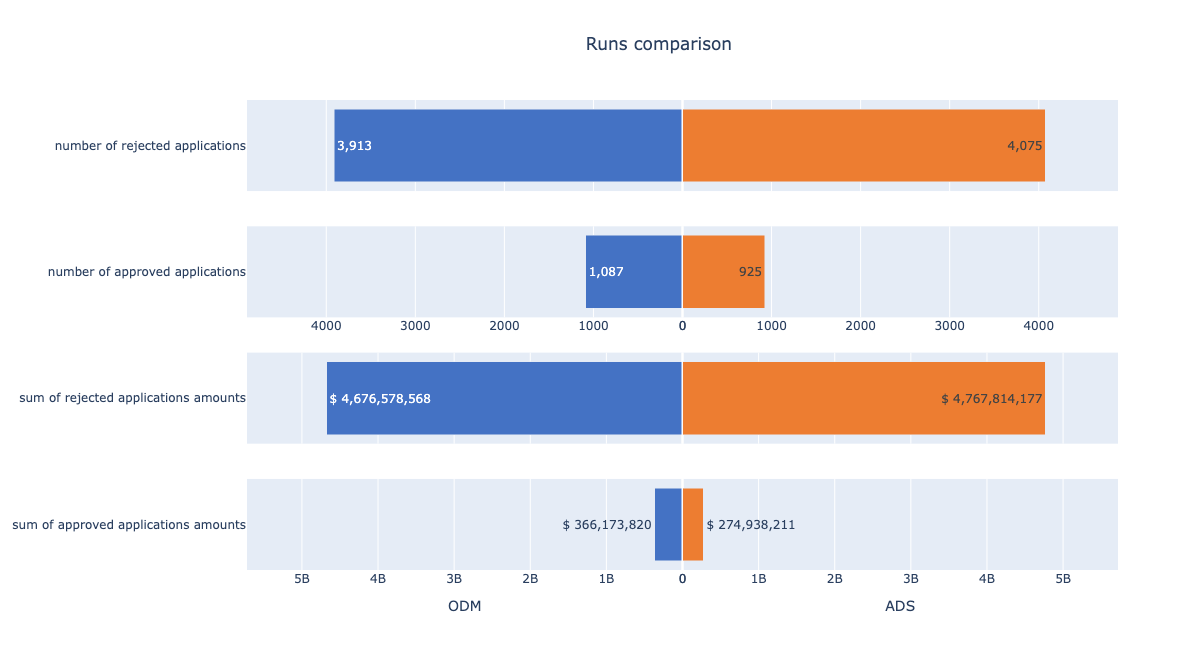

In [32]:
fig = make_subplots(rows=4, cols=2, specs=[[{}, {}], [{}, {}], [{}, {}], [{}, {}]], shared_xaxes=False,
                    shared_yaxes=True, horizontal_spacing=0)

rejected_loan=[datasink_odm.query(select_rejected_decision_odm).shape[0], datasink_ads.query(select_rejected_decision_ads).shape[0]]
rejected_loan_amount=[datasink_odm.query(select_rejected_decision_odm)[get_decision_amount_odm].sum(), datasink_ads.query(select_rejected_decision_ads)[get_decision_amount_ads].sum()]
approved_loan=[datasink_odm.query(select_approved_decision_odm).shape[0], datasink_ads.query(select_approved_decision_ads).shape[0]]
approved_loan_amount=[datasink_odm.query(select_approved_decision_odm)[get_decision_amount_odm].sum(), datasink_ads.query(select_approved_decision_ads)[get_decision_amount_ads].sum()]


fig.append_trace(go.Bar(
    y=['number of rejected applications'],
    x=[rejected_loan[0]],
    name='Rejected',
    text="{:,}".format(rejected_loan[0]),
    textposition='inside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 1, 1)
fig.append_trace(go.Bar(
    y=['number of rejected applications'],
    x=[rejected_loan[1]],
    name='Rejected',
    text="{:,}".format(rejected_loan[1]),
    #base=0,
    textposition='inside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 1, 2)

fig.append_trace(go.Bar(
    y=['number of approved applications'],
    x=[approved_loan[0]],
    name='Approved',
    text="{:,}".format(approved_loan[0]),
    textposition='inside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 2, 1)
fig.append_trace(go.Bar(
    y=['number of approved applications'],
    x=[approved_loan[1]],
    name='Approved',
    text="{:,}".format(approved_loan[1]),
    #base=0,
    textposition='inside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 2, 2)

fig.append_trace(go.Bar(
    y=['sum of rejected applications amounts'],
    x=[rejected_loan_amount[0]],
    name='Rejected',
    text="$ {:,}".format(rejected_loan_amount[0]),
    textposition='inside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 3, 1)
fig.append_trace(go.Bar(
    y=['sum of rejected applications amounts'],
    x=[rejected_loan_amount[1]],
    name='Rejected',
    text="$ {:,}".format(rejected_loan_amount[1]),
    #base=0,
    textposition='inside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 3, 2)

fig.append_trace(go.Bar(
    y=['sum of approved applications amounts'],
    x=[approved_loan_amount[0]],
    name='Approved',
    text="$ {:,}".format(approved_loan_amount[0]),
    textposition='outside',
    showlegend=False,
    marker_color='#4472c4',
    #base=0,
    orientation='h',
), 4, 1)
fig.append_trace(go.Bar(
    y=['sum of approved applications amounts'],
    x=[approved_loan_amount[1]],
    name='Approved',
    text="$ {:,}".format(approved_loan_amount[1]),
    #base=0,
    textposition='outside',
    showlegend=False,
    orientation='h',
    marker_color='#ed7d31'
), 4, 2)

butterfly_amount_view_width_ratio = max([datasink_ads.query(select_rejected_decision_ads)[get_decision_amount_ads].sum(),
                                        datasink_ads.query(select_approved_decision_ads)[get_decision_amount_ads].sum(),
                                        datasink_odm.query(select_rejected_decision_odm)[get_decision_amount_ads].sum(),
                                        datasink_odm.query(select_approved_decision_odm)[get_decision_amount_ads].sum()]) * 1.2

butterfly_approval_view_width_ratio = max([datasink_ads.query(select_rejected_decision_ads).shape[0],
                                        datasink_ads.query(select_approved_decision_ads).shape[0],
                                        datasink_odm.query(select_rejected_decision_odm).shape[0],
                                        datasink_odm.query(select_approved_decision_odm).shape[0]]) * 1.2

fig.update_xaxes(showticklabels=False, row=1, col=1, range=[butterfly_approval_view_width_ratio, 0])
fig.update_xaxes(showticklabels=False, row=1, col=2, range=[0, butterfly_approval_view_width_ratio])

fig.update_xaxes(showticklabels=True, row=2, col=1, range=[butterfly_approval_view_width_ratio, 0])
fig.update_xaxes(showticklabels=True, row=2, col=2, range=[0, butterfly_approval_view_width_ratio])

fig.update_xaxes(showticklabels=False, row=3, col=1, range=[butterfly_amount_view_width_ratio, 0])
fig.update_xaxes(showticklabels=False, row=3, col=2, range=[0, butterfly_amount_view_width_ratio])

fig.update_xaxes(showticklabels=True, title_text="ODM", row=4, col=1, range=[butterfly_amount_view_width_ratio, 0])
fig.update_xaxes(showticklabels=True, title_text="ADS", row=4, col=2, range=[0, butterfly_amount_view_width_ratio])


fig.update_layout(
    barmode='stack',
    height=650,
    title={'text': f"Runs comparison",
          'x':0.55,
          'xanchor': 'center'
    })

"""
fig.update_yaxes(
        ticktext=bidirectional_bar_chart_label,
        tickvals=bidirectional_bar_chart_label
    )
"""

iplot(fig)

__RADAR CHART__

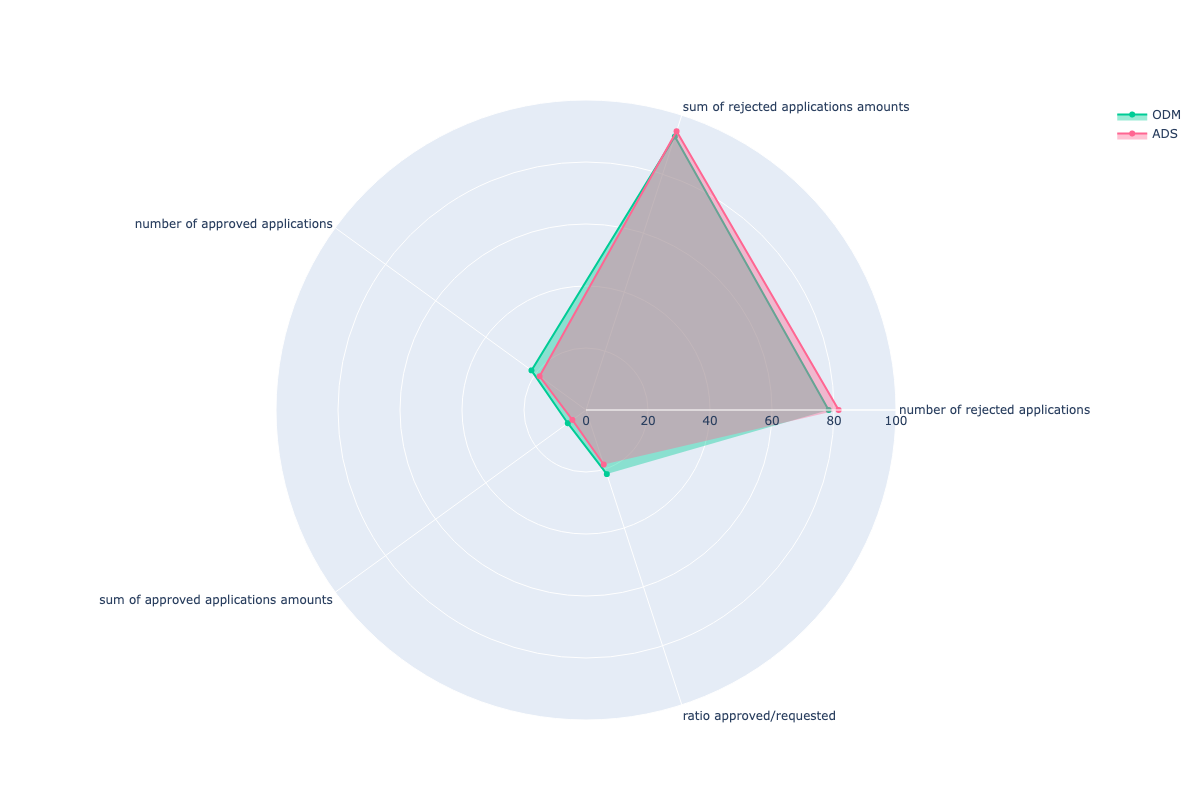

In [33]:
fig = go.Figure()

#radar dimension normalization 
radar_max_value = 100

values = np.array([[rejected_loan[0], rejected_loan_amount[0], approved_loan[0], approved_loan_amount[0], approved_loan[0]/(approved_loan[0]+rejected_loan[0])],
                   [rejected_loan[1], rejected_loan_amount[1], approved_loan[1], approved_loan_amount[1], approved_loan[1]/(approved_loan[1]+rejected_loan[1])],
                   [
                    max(datasink_ads.shape[0], datasink_odm.shape[0]), 
                    max(datasink_ads[get_decision_amount_ads].sum(), datasink_odm[get_decision_amount_odm].sum()), 
                    max(datasink_ads.shape[0], datasink_odm.shape[0]),
                    max(datasink_ads[get_decision_amount_ads].sum(), datasink_odm[get_decision_amount_odm].sum()), 
                    1
                   ]
                  ])
normed_values = (values*radar_max_value) / values.max(axis=0)

def radar_normalization(values, max_value):
    normalized_values = []
    for value in values:
        normalized_values.append((value*max_value)/max(values))
    return normalized_values

fig.add_trace(go.Scatterpolar(
      r=normed_values[0],
      theta=radar_chart_labels,
      marker_color='rgb(0,204,150)',
      fillcolor='rgba(0,204,150,0.4)',
      fill='toself',
      name='ODM',
))
fig.add_trace(go.Scatterpolar(
      r=normed_values[1],
      theta=radar_chart_labels,
      marker_color='rgb(255, 102, 146)',
      fillcolor='rgba(255, 102, 146,0.4)',
      fill='toself',
      name='ADS'
))

fig.update_layout(
  height=800,
  polar=dict(
    #bgcolor= 'rgb(239, 239, 232)',
    radialaxis=dict(
      visible=True,
      range=[0, radar_max_value],
      #linecolor='red',
      #gridcolor='red',
      #axiscolor='red',
      #tickcolor='red',
    )),
  #showlegend=False
)

fig.show()

__VIOLIN PLOT__

__VIOLIN FIRST VARIANT__ FOR LOAN AMOUNT

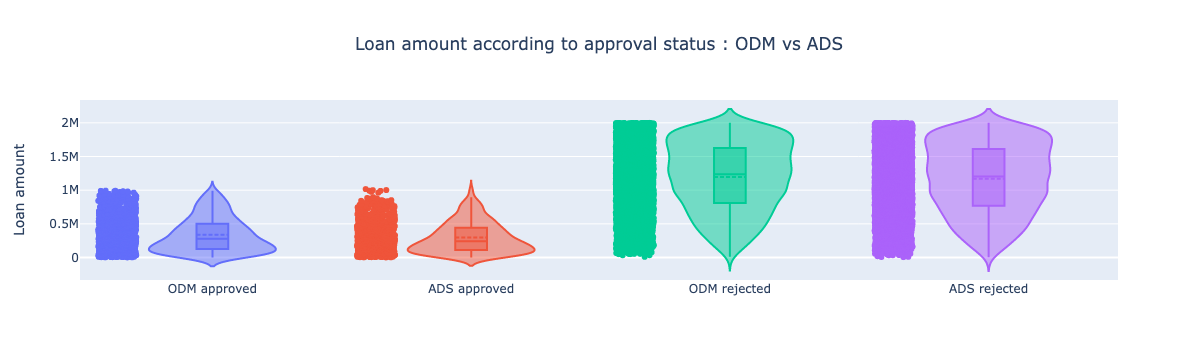

In [34]:
subplot_titles = ['ODM approved', 'ADS approved', 'ODM rejected', 'ADS rejected']
select_decision_approval_status = [select_approved_decision_odm, select_approved_decision_ads, select_rejected_decision_odm, select_rejected_decision_ads]
datasink =[datasink_odm, datasink_ads, datasink_odm, datasink_ads]
get_decision_value = [get_decision_amount_odm, get_decision_amount_ads, get_decision_amount_odm, get_decision_amount_ads] # Y value 

fig = go.Figure()
for idx, approval in enumerate(select_decision_approval_status):
    fig.add_trace(go.Violin(y=datasink[idx].query(approval)[get_decision_value[idx]],
                            name=subplot_titles[idx],
                            box_visible=True,
                            meanline_visible=True,
                            points='all'
                            ))

fig.update_yaxes(title_text='Loan amount')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"Loan amount according to approval status : ODM vs ADS",
          'x':0.5,
          'xanchor': 'center'
    })

fig.show()

__VIOLIN SECOND VARIANT__ FOR LOAN AMOUNT

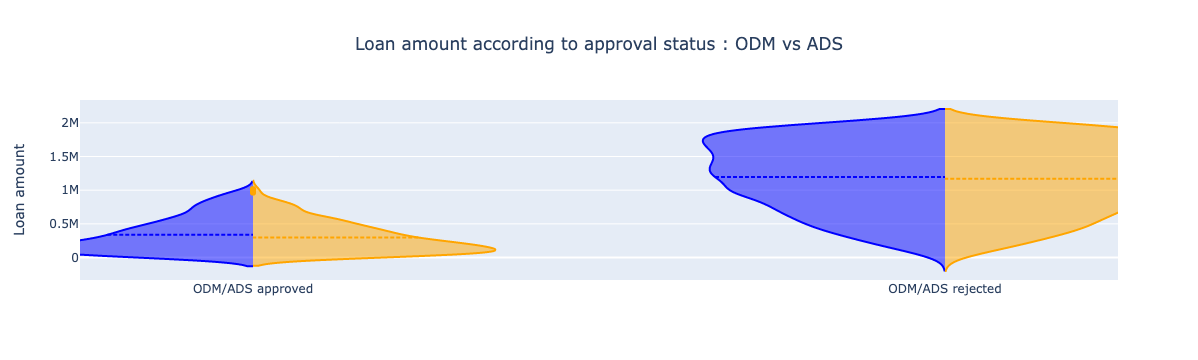

In [35]:
subplot_titles = ['ODM/ADS approved', 'ODM/ADS rejected']
select_decision_approval_status = [select_approved_decision_odm, select_rejected_decision_odm, select_approved_decision_ads, select_rejected_decision_ads]
datasink =[datasink_odm, datasink_ads]

fig = go.Figure()
for idx in range(0,2):
    fig.add_trace(go.Violin(y=datasink_odm.query(select_decision_approval_status[idx])[get_decision_amount_odm],
                            name=subplot_titles[idx],
                            legendgroup=subplot_titles[idx], scalegroup=subplot_titles[idx],
                            side='negative',
                            line_color='blue')
                )
    fig.add_trace(go.Violin(y=datasink_ads.query(select_decision_approval_status[idx+2])[get_decision_amount_ads],
                            name=subplot_titles[idx],
                            legendgroup=subplot_titles[idx], scalegroup=subplot_titles[idx],
                            side='positive',
                            line_color='orange')
                )

fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.update_yaxes(title_text='Loan amount')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"Loan amount according to approval status : ODM vs ADS",
          'x':0.5,
          'xanchor': 'center'
    })
fig.show()

__VIOLIN VARIANT FOR CREDIT SCORE__

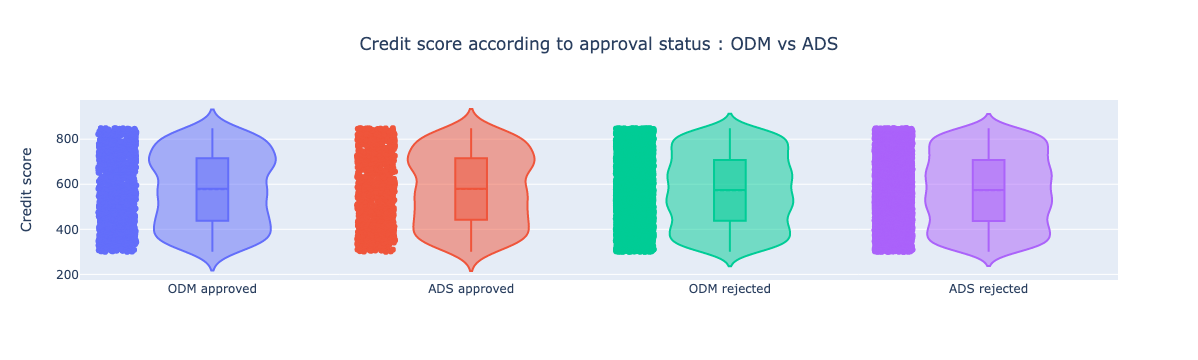

In [36]:
subplot_titles = ['ODM approved', 'ADS approved', 'ODM rejected', 'ADS rejected']
select_decision_approval_status = [select_approved_decision_odm, select_approved_decision_ads, select_rejected_decision_odm, select_rejected_decision_ads]
datasink =[datasink_odm, datasink_ads, datasink_odm, datasink_ads]
get_decision_value = [get_decision_borrower_credit_score_odm, get_decision_borrower_credit_score_ads, get_decision_borrower_credit_score_odm, get_decision_borrower_credit_score_ads] # Y value 

fig = go.Figure()
for idx, approval in enumerate(select_decision_approval_status):
    fig.add_trace(go.Violin(y=datasink[idx].query(approval)[get_decision_value[idx]],
                            name=subplot_titles[idx],
                            box_visible=True,
                            meanline_visible=True,
                            points='all'
                            ))

fig.update_yaxes(title_text='Credit score')

fig.update_layout(
    barmode='stack', 
    showlegend=False,
    title={'text': f"Credit score according to approval status : ODM vs ADS",
          'x':0.5,
          'xanchor': 'center'
    })

fig.show()

__LOAN REQUEST MAPBOX__

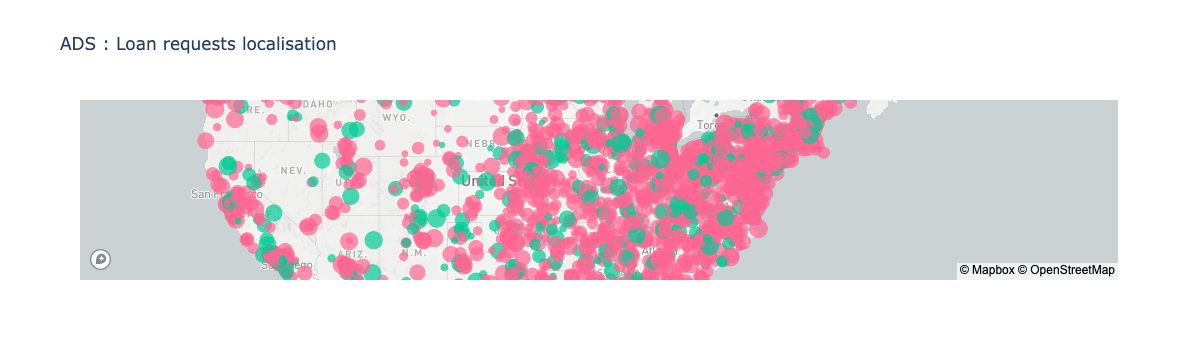

In [37]:
mapbox_access_token = "pk.eyJ1IjoiZGVtYmVsZXQiLCJhIjoiY2t0Mm5oeWo4MGx6ODJ3cXAwejNtMTFncCJ9.9cyxovpJjJUINMrw4ofe_g"

nomi = pgeocode.Nominatim('us')
df=nomi.query_postal_code(datasink_ads[get_decision_borrower_zipcode_ads].values)

fig = go.Figure(data=go.Scattermapbox(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['place_name'],
        mode = 'markers',
        marker=go.scattermapbox.Marker(
            size=array_normalize(datasink_ads[get_decision_borrower_credit_score_ads], 20),
            color=set_colors(datasink_ads[get_decision_approval_ads])
        ),
        ))

fig.update_layout(
    title='ADS : Loan requests localisation',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=df['latitude'].mean(),
            lon=df['longitude'].mean()
        ),
        pitch=0,
        zoom=3,
        style='light'
    ),
)
fig.show()

__LOAN REQUEST MAP__

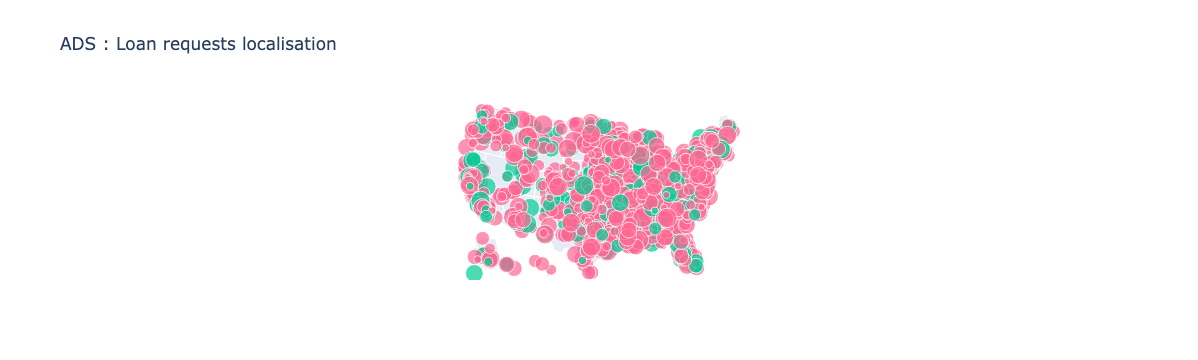

In [38]:
nomi = pgeocode.Nominatim('us')
df=nomi.query_postal_code(datasink_ads[get_decision_borrower_zipcode_ads].values)

fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['place_name'],
        mode = 'markers',
        marker_size=array_normalize(datasink_ads[get_decision_borrower_credit_score_ads], 20),
        marker_color=set_colors(datasink_ads[get_decision_approval_ads])
        ))

fig.update_layout(
        title = 'ADS : Loan requests localisation',
        geo_scope='usa',
    )
fig.show()